In [0]:
#Listing files in a directory using Databricks Utilities (dbutils) 
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1682161219000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677682877000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679510757000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675268719000),
 FileInfo(path='dbfs:/FileStore/tables/archive__1_-1.zip', name='archive__1_-1.zip', size=35601528, modificationTime=1675526853000),
 FileInfo(path='dbfs:/FileStore/tables/archive__1_-2.zip', name='archive__1_-2.zip', size=35601528, modificationTime=1675527260000),
 FileInfo(path='dbfs:/FileStore/tables/archive__1_.zip', name='archive__1_.zip', si

In [0]:
#Reading the csv file into dataframe

clinical_df = spark.read.option("header", True).option("escape",'\"').option("sep", "|").csv("/FileStore/tables/clinicaltrial_2021.csv")



In [0]:
#Reading a CSV file "pharma.csv" into a Spark DataFrame called pharma_df

pharma_df = spark.read.option("header", True).option("escape",'\"').csv("/FileStore/tables/pharma.csv")

In [0]:
#Displaying the first 5 rows of a DataFrame called clinical_df
clinical_df.show(5)

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+-------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+-------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|         null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|         null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|         null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  May 2016|Tuberculosis,Lung...|         null|

In [0]:
#Displaying the first 5 rows of a DataFrame called pharma_df

pharma_df.show(1)

+-------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+--------------+---------------------+-----+-------+-----------------------------+------------------+--------------+----+-------+----+----------+-----------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+-----+
|            Company|     Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|Civil/Criminal|Prosecution_Agreement|Court|Case_ID|Private_Li

In [0]:
#Filtering the DataFrame clinical_df to show the first 5 rows where the Sponsor column is null

clinical_df.filter(clinical_df.Sponsor.isNull()).show(5)

+---+-------+------+-----+----------+----+----------+----------+-------------+
| Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions|
+---+-------+------+-----+----------+----+----------+----------+-------------+
+---+-------+------+-----+----------+----+----------+----------+-------------+



In [0]:
#Filtering the DataFrame pharma_df to show the first 5 rows where the Sponsor column is null

pharma_df.filter(pharma_df.Parent_Company.isNull()).show()

+-------+--------------+--------------+------------------------+---------------------------------------------------------+------------+------------+-------------+---------------+-----------------+-----------+-------------------+-----------+------+--------------+---------------------+-----+-------+-----------------------------+------------------+--------------+----+-------+---+----------+-----------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+-----------+-----+
|Company|Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|Offense_Group|Primary_Offense|Secondary_Offense|Description|Level_of_Government|Action_Type|Agency|Civil/Criminal|Prosecution_Agreement|Court|Case_ID|Private_Litigation_Case_Title|Lawsuit_Resolution|Facility_State|City|Address|Zip|NAICS_Code|NAICS_Translation|HQ_Country_of_Parent|HQ_

In [0]:
#Importing the PySpark SQL functions module as f

import pyspark.sql.functions as f

In [0]:
# QUESTION 1
#The number of studies in the dataset

#Filtering the DataFrame clinical_df to show the count of studies for each Type and displays the first 5 rows

clinical_df.filter(f.col("Type") != "") \
         .groupby("Type") \
         .count() \
         .select(f.sum("count").alias("Total_Studies")) \
         .show(5)


+-------------+
|Total_Studies|
+-------------+
|       387261|
+-------------+



In [0]:
# QUESTION 2

#Filtering the DataFrame clinical_df to show the count of studies for each Type and displays the first 5 rows in descending order

clinical_df.filter("Type != ' '") \
   .groupby('Type') \
   .count() \
   .toDF('Type', 'frequency') \
   .orderBy('frequency', ascending=False) \
   .show(5)

+--------------------+---------+
|                Type|frequency|
+--------------------+---------+
|      Interventional|   301472|
|       Observational|    77540|
|Observational [Pa...|     8180|
|     Expanded Access|       69|
+--------------------+---------+



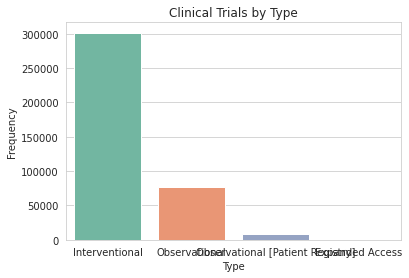

In [0]:
#Creating a bar plot using the seaborn and matplotlib libraries based on the frequency of clinical trials by Type

import seaborn as sns
import matplotlib.pyplot as plt

df = clinical_df.filter("Type != ' '") \
                .groupby('Type') \
                .count() \
                .toDF('Type', 'frequency') \
                .orderBy('frequency', ascending=False) \
                .toPandas()

sns.set_style("whitegrid")
sns.barplot(x="Type", y="frequency", data=df, palette="Set2")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Clinical Trials by Type")
plt.show()


In [0]:
# QUESTION 3

#Splitting the Conditions column in the DataFrame clinical_df by comma, creates a new DataFrame with the individual conditions and displays the top 5 most frequent conditions

from pyspark.sql.functions import split, explode, trim, col

clinical_df.select(explode(split(col("Conditions"), ",")).alias("Conditions")) \
         .withColumn("Conditions", trim(col("Conditions"))) \
         .groupBy("Conditions") \
         .agg({"*": "count"}) \
         .withColumnRenamed("count(1)", "frequencies") \
         .orderBy("frequencies", ascending=False) \
         .limit(5) \
         .show()

+-----------------+-----------+
|       Conditions|frequencies|
+-----------------+-----------+
|        Carcinoma|      13389|
|Diabetes Mellitus|      11080|
|        Neoplasms|       9371|
| Breast Neoplasms|       8640|
|         Syndrome|       8032|
+-----------------+-----------+



In [0]:

#QUESTION 4

#Joining the Pham_Company column of the pharmaceutical and clinicaltrials DataFrames, filters out null values, groups by Pham_Company, counts the number of occurrences, and displays the top 10 missing companies in the clinicaltrials DataFrame


pharmaceutical = pharma_df.select(trim(col("Parent_Company")).alias("Pham_Company")) \
                   .filter(col("Pham_Company") != "")

clinicaltrials = clinical_df.select(trim(col("Sponsor")).alias("Pham_Company")) \
                    .filter(col("Pham_Company") != "")

missing_companies = clinicaltrials.join(pharmaceutical , "Pham_Company", "left_anti") \
                           .groupBy("Pham_Company") \
                           .count() \
                           .orderBy(col("count").desc()) \
                           .limit(10)

missing_companies.show()

+--------------------+-----+
|        Pham_Company|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+



In [0]:
#QUESTION 5

#Filtering the DataFrame clinical_df to show the count of studies completed in 2019 by month and displays the top 50 results

clinical_df.select(f.col("Completion").alias("Completion_Date")) \
   .where("Completion_Date like '%2019%'") \
   .groupby("Completion_Date") \
   .count() \
   .toDF('Completion_Date', 'Total_Studies') \
   .select(f.from_unixtime(f.unix_timestamp(f.trim(f.substring('Completion_Date', 1, 3)),'MMM'),'MM')
           .alias("Month"),f.col("Completion_Date"),f.col("Total_Studies")) \
   .orderBy("Month") \
   .show(50)


+-----+---------------+-------------+
|Month|Completion_Date|Total_Studies|
+-----+---------------+-------------+
|   01|       Jan 2019|         2000|
|   02|       Feb 2019|         1606|
|   03|       Mar 2019|         2106|
|   04|       Apr 2019|         1889|
|   05|       May 2019|         1950|
|   06|       Jun 2019|         2521|
|   07|       Jul 2019|         2206|
|   08|       Aug 2019|         2021|
|   09|       Sep 2019|         2155|
|   10|       Oct 2019|         1953|
|   11|       Nov 2019|         1789|
|   12|       Dec 2019|         5139|
+-----+---------------+-------------+



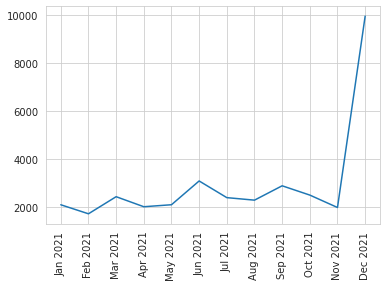

In [0]:
#Filtering the DataFrame clinical_df to show the count of studies completed in 2021 by month and displays the results ordered by month

Completed_Studies=clinical_df.select(f.col("Completion").alias("Completion_Date")) \
   .where("Completion_Date like '%2021%'") \
   .groupby("Completion_Date") \
   .count() \
   .toDF('Completion_Date', 'Total_Studies') \
   .select(f.from_unixtime(f.unix_timestamp(f.trim(f.substring('Completion_Date', 1, 3)),'MMM'),'MM').alias("Month"),f.col("Completion_Date"),f.col("Total_Studies")) \
   .orderBy("Month")

# getting X and Y variables for plotting
x = [row['Completion_Date'] for row in Completed_Studies.collect()]
y = [int(row['Total_Studies']) for row in Completed_Studies.collect()]
 
import matplotlib.pyplot as plt
%matplotlib inline
 
# Creating plot
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

In [0]:
#Filtering the DataFrame clinical_df to show the count of studies completed in 2021 by month and displays the results ordered by month using PySpark SQL functions

from pyspark.sql.functions import col, trim, substring, unix_timestamp, from_unixtime, month

clinical_df.select(trim(substring("Completion", 1, 10)).alias("Completion_Date")) \
           .where(col("Completion_Date").like("%2021%")) \
           .groupBy("Completion_Date") \
           .count() \
           .withColumnRenamed("count", "Total_Studies") \
           .select(from_unixtime(unix_timestamp(trim(substring(col("Completion_Date"), 1, 3)), "MMM"), "MMMM").alias("Month"), 
                   col("Completion_Date"), 
                   col("Total_Studies")) \
           .orderBy(month("Month")) \
           .show(50, truncate=False)

+---------+---------------+-------------+
|Month    |Completion_Date|Total_Studies|
+---------+---------------+-------------+
|December |Dec 2021       |9968         |
|March    |Mar 2021       |2447         |
|September|Sep 2021       |2901         |
|May      |May 2021       |2112         |
|November |Nov 2021       |1997         |
|October  |Oct 2021       |2514         |
|June     |Jun 2021       |3102         |
|February |Feb 2021       |1735         |
|August   |Aug 2021       |2303         |
|January  |Jan 2021       |2111         |
|July     |Jul 2021       |2408         |
|April    |Apr 2021       |2029         |
+---------+---------------+-------------+



In [0]:
#further analyses of the data 

In [0]:
#the top conditions sponsored by Novo Nordisk A/S in clinical trials, and how many trials have they sponsored for each of these conditions


# grouping clinical trial conditions by sponsor and count.

clinical_df.filter(col("Sponsor") == "Novo Nordisk A/S") \
                .groupBy("Sponsor", "Conditions") \
                .count() \
                .orderBy(col("count").desc()) \
                .select(col("Sponsor"), col("Conditions"), col("count").alias("ConditionCount")) \
                .show()

+----------------+--------------------+--------------+
|         Sponsor|          Conditions|ConditionCount|
+----------------+--------------------+--------------+
|Novo Nordisk A/S|   Diabetes Mellitus|           636|
|Novo Nordisk A/S|                null|           108|
|Novo Nordisk A/S|Hemostatic Disord...|            39|
|Novo Nordisk A/S|  Obesity,Overweight|            19|
|Novo Nordisk A/S|Hemostatic Disord...|            18|
|Novo Nordisk A/S|Hemostatic Disord...|            17|
|Novo Nordisk A/S|Dwarfism,Endocrin...|            16|
|Novo Nordisk A/S|Obesity,Nutrition...|            13|
|Novo Nordisk A/S|Arthritis,Inflamm...|            12|
|Novo Nordisk A/S|        Hemophilia A|             9|
|Novo Nordisk A/S|            Dwarfism|             8|
|Novo Nordisk A/S|Hemostatic Disord...|             7|
|Novo Nordisk A/S|Diabetes Mellitus...|             7|
|Novo Nordisk A/S|Hemostatic Disord...|             7|
|Novo Nordisk A/S|          Overweight|             6|
|Novo Nord

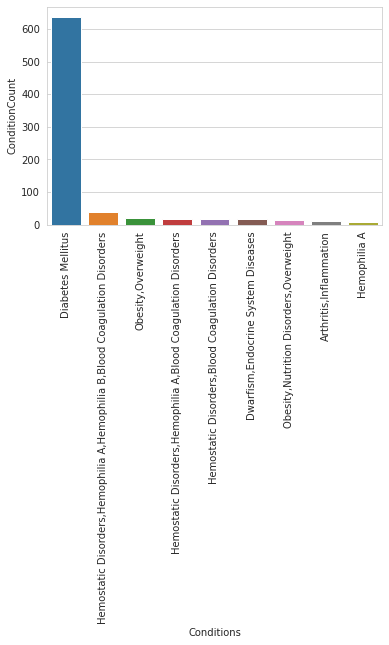

In [0]:
#Importing the seaborn and matplotlib libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# convert Spark data frame to pandas data frame
df = clinical_df.filter(col("Sponsor") == "Novo Nordisk A/S") \
                .groupBy("Sponsor", "Conditions") \
                .count() \
                .orderBy(col("count").desc()) \
                .select(col("Sponsor"), col("Conditions"), col("count").alias("ConditionCount")) \
                .toPandas()

# plot bar plot
sns.barplot(x='Conditions', y='ConditionCount', data=df.head(10))
plt.xticks(rotation=90)
plt.show()


In [0]:
## user defined function to check The number of studies in the dataset 

from pyspark.sql.functions import udf, sum
from pyspark.sql.types import BooleanType

# Defining the UDF to check if value is not null
def is_not_null(val):
    return val != ""

# Registering the UDF
is_not_null_udf = udf(is_not_null, BooleanType())

# Applying the UDF and groupby Type
clinical_df.filter(is_not_null_udf(f.col("Type"))) \
           .groupby("Type") \
           .count() \
           .select(sum("count").alias("Total_Studies")) \
           .show(5)


+-------------+
|Total_Studies|
+-------------+
|       387261|
+-------------+



In [0]:
#Distribution of clinical trials by type and sponsor
from pyspark.sql.functions import count, desc


clinical_df.groupBy('Type', 'Sponsor') \
    .agg(count('*').alias('Trials')) \
    .sort(desc('Trials')) \
    .show()


+--------------+--------------------+------+
|          Type|             Sponsor|Trials|
+--------------+--------------------+------+
|Interventional|     GlaxoSmithKline|  2986|
|Interventional|National Cancer I...|  2757|
|Interventional|              Pfizer|  2251|
|Interventional|Merck Sharp & Doh...|  2062|
|Interventional|         AstraZeneca|  2022|
|Interventional|Novartis Pharmace...|  2009|
|Interventional|M.D. Anderson Can...|  1999|
|Interventional|         Mayo Clinic|  1789|
|Interventional|Boehringer Ingelheim|  1641|
|Interventional|Massachusetts Gen...|  1638|
|Interventional|Eli Lilly and Com...|  1612|
|Interventional|Assistance Publiq...|  1567|
|Interventional|    Cairo University|  1547|
|Interventional|   Hoffmann-La Roche|  1489|
|Interventional|University of Cal...|  1318|
|Interventional|              Sanofi|  1242|
|Interventional|     Duke University|  1229|
|Interventional|Memorial Sloan Ke...|  1207|
|Interventional| Stanford University|  1198|
|Intervent

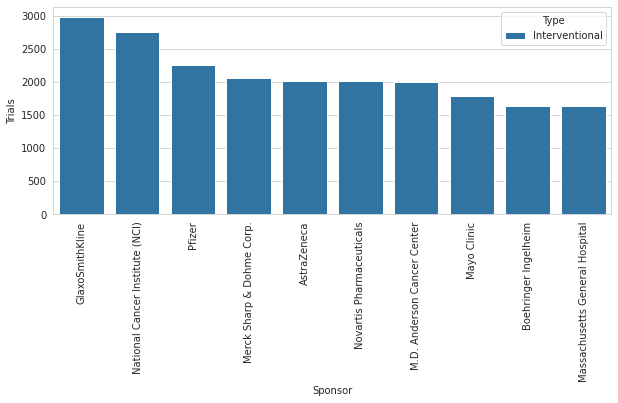

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# converting Spark data frame to pandas data frame
df = clinical_df.groupBy('Type', 'Sponsor') \
    .agg(count('*').alias('Trials')) \
    .sort(desc('Trials')) \
    .toPandas()

# plotting bar plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Sponsor', y='Trials', hue='Type', data=df.head(10), ax=ax)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)
plt.show()


In [0]:
#the number of clinical trials sponsored by each company listed in the pharma table.

#Joining Clinical and Pharma Datasets to Count Sponsors

sponsor_count_df = clinical_df.join(
  pharma_df,
  clinical_df.Sponsor == pharma_df.Parent_Company,
  how="left"
).groupBy("Company").count()

sponsor_count_df.show()


+--------------------+-----+
|             Company|count|
+--------------------+-----+
|  CHIRON CORPORATION|  690|
|Actavis Mid-Atlan...|   80|
|Sanofi-Aventis U....| 1274|
|Abbott Laboratori...| 2100|
|         PLIVA, INC.|   80|
|E R SQUIBB & SONS...| 1171|
|COVIDIEN DBA MALL...|   86|
|       HOSPIRA, INC.| 2645|
|NOVARTIS CONSUMER...|  690|
|Watson Pharmaceut...|  525|
|Novartis Animal H...|  690|
|AstraZeneca Pharm...|10764|
|Novartis Vaccines...| 1380|
|AstraZeneca Pharm...| 5382|
|Forest Laboratori...|  525|
|  Mallinckrodt, Inc.|  172|
|Watson Laboratori...|  525|
|GlaxoSmithKline H...| 3378|
|      SANOFI PASTEUR| 2548|
|Teva Pharmaceutic...|   80|
+--------------------+-----+
only showing top 20 rows

